# Advertising Sales Channel Prediction 

Problem statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Advertising-Sales-Channel-Prediction/Data/adverstising.csv")

In [43]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [44]:
data = data.iloc[:,1:]

In [45]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [46]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


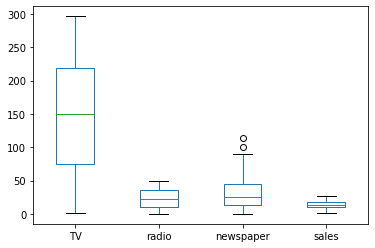

In [47]:
data.plot(kind="box")

In [48]:
#There is some outliers in newspaper column, since it is only 1% we can neglet it

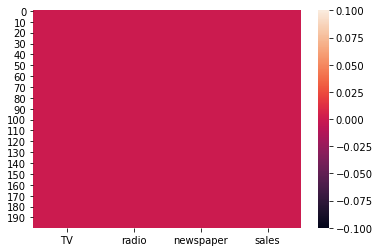

In [49]:
sns.heatmap(data.isnull())

In [50]:
#no null values

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


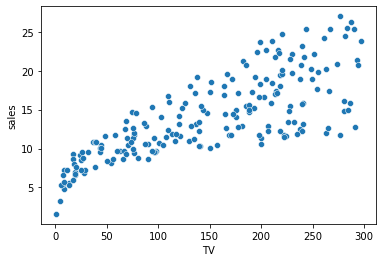

In [51]:
sns.scatterplot(data["TV"], data["sales"])

In [52]:
#TV is positivley correlated with sales

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


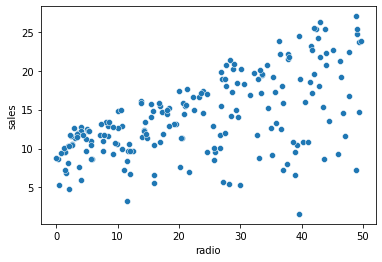

In [53]:
sns.scatterplot(data["radio"], data["sales"])

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


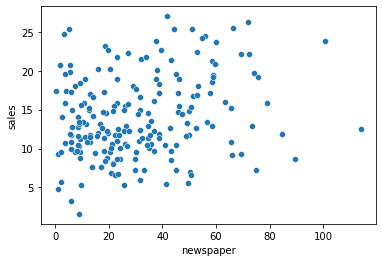

In [54]:
sns.scatterplot(data["newspaper"], data["sales"])

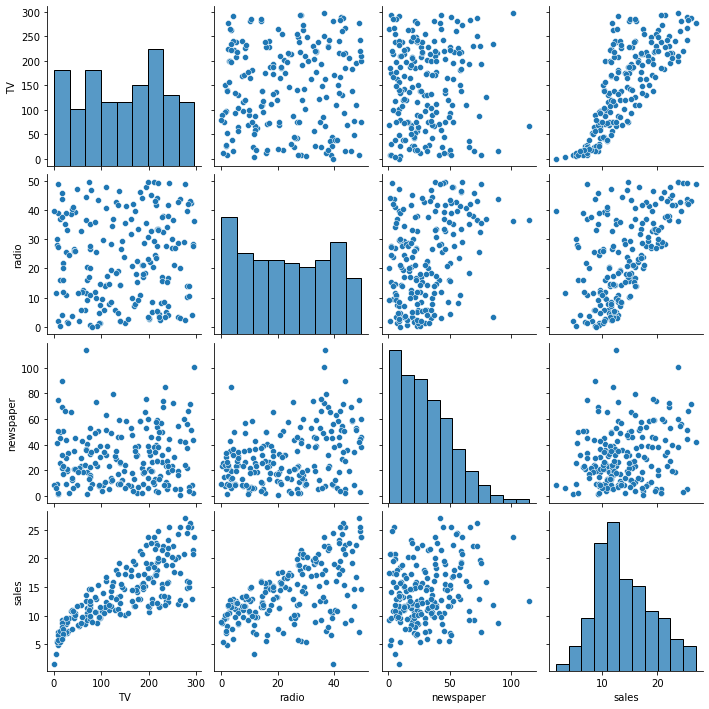

In [55]:
sns.pairplot(data)

In [56]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000175A6FC9160>,
      dtype=object)

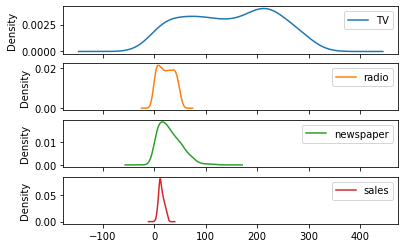

In [57]:
data.plot(kind="density", subplots=True)

In [58]:
#We have slew in newspaper data set

In [59]:
from sklearn.preprocessing import PowerTransformer

In [60]:
pt = PowerTransformer()

In [61]:
pt.fit(np.array(data["newspaper"]).reshape(-1,1))

PowerTransformer()

In [62]:
data["newspaper"] = pt.transform(np.array(data["newspaper"]).reshape(-1,1))

In [63]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,1.514335,22.1
1,44.5,39.3,0.787683,10.4
2,17.2,45.9,1.516998,9.3
3,151.5,41.3,1.214656,18.5
4,180.8,10.8,1.211704,12.9
...,...,...,...,...
195,38.2,3.7,-0.682576,7.6
196,94.2,4.9,-1.142011,9.7
197,177.0,9.3,-1.313050,12.8
198,283.6,42.0,1.433350,25.5


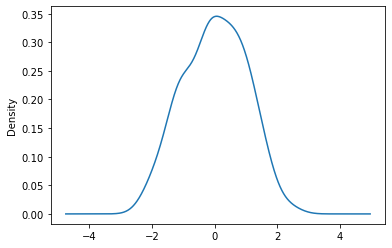

In [64]:
data["newspaper"].plot(kind="density")

In [65]:
#skewness is removed

In [66]:
x = data.iloc[:,:-1]

In [67]:
y = data.iloc[:,-1]

In [68]:
# the newspaper data range is very small compared to the other columns. So, we have to scale the Tv and Radio columns

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler(feature_range=(1,10))
print(scaler.fit(x))

MinMaxScaler(feature_range=(1, 10))


In [71]:
scaler.data_max_

array([296.4       ,  49.6       ,   2.52943514])

In [72]:
x = scaler.transform(x)

In [73]:
x

array([[ 7.98207643,  7.85887097,  8.11792394],
       [ 2.33310788,  8.13104839,  6.7706517 ],
       [ 1.50219817,  9.32862903,  8.1228599 ],
       [ 5.58978695,  8.49395161,  7.56229539],
       [ 6.48156916,  2.95967742,  7.55682131],
       [ 1.24349002,  9.87298387,  8.39731194],
       [ 2.72877917,  6.9516129 ,  5.1104419 ],
       [ 4.63713223,  4.55645161,  3.74520897],
       [ 1.2404464 ,  1.38104839,  1.35622111],
       [ 7.05985796,  1.47177419,  4.8856339 ],
       [ 2.99053094,  2.05241935,  5.17624678],
       [ 7.51335813,  5.35483871,  2.33884207],
       [ 1.70307744,  7.36895161,  7.95252879],
       [ 3.94622929,  2.37903226,  3.03003173],
       [ 7.19073385,  6.96975806,  6.82798592],
       [ 6.92593845,  9.65524194,  7.24648444],
       [ 3.04227257,  7.64112903, 10.        ],
       [ 9.54345621,  8.18548387,  7.41244205],
       [ 3.08488333,  4.71975806,  4.58053356],
       [ 5.46195468,  5.33669355,  4.6673874 ],
       [ 7.62597227,  6.02620968,  7.275

In [74]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 151


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 151)

In [77]:
y_train

146    13.2
154    15.6
114    14.6
158     7.3
99     17.2
       ... 
85     15.2
71     12.4
44      8.5
117     9.4
152    16.6
Name: sales, Length: 156, dtype: float64

In [87]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': 0.9348969296567898, 'KNN': 0.9399099782026185, 'RandomForest': 0.9756796646396491, 'LinearRegression': 0.9429033773394224, 'Ridge': 0.9429417492788823, 'dtr': 0.9558103211295764}


In [88]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [89]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': 0.9173401990972341, 'KNeighborsRegressor()': 0.9500757058486508, 'RandomForestRegressor()': 0.9762197701363312, 'LinearRegression()': 0.8862315547791276, 'Ridge()': 0.8862348169402822, 'DecisionTreeRegressor()': 0.9473626813407247}


<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>


<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>CV Accuracy</th>
     <th>Difference</th>
  </tr>
  <tr  >
    <td>SVR</td>
    <td>93.5</td>
    <td>91.7</td>
      <td> 1.8</td>
  </tr>
  <tr >
    <td>KNN</td>
    <td>93.4</td>
    <td>95.0</td>
      <td>1.6</td>
  </tr>
    <tr style="color:green;">
    <td>RandomForest</td>
    <td>97.6</td>
    <td>97.6</td>
      <td>0.0</td>
  </tr>
    <tr>
    <td>Linear Regression</td>
    <td>94.2</td>
    <td>88.6</td>
      <td>5.8</td>
  </tr>
    <tr>
    <td>Ridge</td>
    <td>92.4</td>
    <td>88.6</td>
      <td>5.8</td>
  </tr>
    <tr>
    <td>DecisonTree</td>
    <td>95.5</td>
    <td>94.7</td>
      <td>0.8</td>
  </tr>
</table>

</body>
</html>

In [90]:
from sklearn.model_selection import  GridSearchCV


In [111]:
param_grid = {"random_state":np.arange(1,10) , 'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [112]:
rfr = RandomForestRegressor()

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 9, 'random_state': 4}


In [113]:
gc_pred = g_search.best_estimator_.predict(x_test)

In [114]:
r2_score(y_test, gc_pred)

0.9656519080860033

In [105]:
import joblib

In [107]:
joblib.dump(g_search.best_estimator_, "SalesModel.obj")

['SalesModel.obj']